In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# Dataset Description

The data is taken from "https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes"

The dataset contains information about used audi cars and their market price 
It contains columns such as:
- Model : Model of the car
- Year : Registration year
- Price : Price of the car
- tranmission : Type of gearbox used
- fuelType : Type of fuel used
- tax : Tax applied 
- mileage : Distance the car has travlled
- mpg : Miles per gallon
- engineSize : Size of the car engine

# Objective

- To perform EDA to understand the underlying trends 
- Clean the data and prepare it for regression models
- Fit different regression models and compare their performance at predicting the price of the car

# EDA

In [2]:
data = pd.read_csv("audi.csv")
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [3]:
print("Data has\033[1m" , data.shape[0] , "\033[0mrows and\033[1m", data.shape[1] , "\033[0mcolumns\n\n")
print("Column Name \t Data Type\n")
print(data.dtypes) 

Data has 10668 rows and 9 columns


Column Name 	 Data Type

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object


In [4]:
data.isnull().sum()  # no missing values in the dataset

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
print("There are\033[1m", data.duplicated().sum() ,"\033[0mduplicated values in the dataset")

There are 103 duplicated values in the dataset


In [6]:
data_copy = data.copy() # create a copy of the original data

In [7]:
data_copy.drop_duplicates(inplace=True)  # drop the duplicates 

In [8]:
data_copy.shape # 10565 rows remaining

(10565, 9)

In [9]:
#import the libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lets Inspect each column

In [10]:
print("Types of Transmission:\n")
print(data_copy['transmission'].value_counts()/len(data_copy)*100)
print("\n\n")
print("Fuel Types:\n") 
print(data_copy['fuelType'].value_counts()/len(data_copy)*100)

Types of Transmission:

Manual       40.861335
Semi-Auto    33.771888
Automatic    25.366777
Name: transmission, dtype: float64



Fuel Types:

Diesel    52.408897
Petrol    47.326077
Hybrid     0.265026
Name: fuelType, dtype: float64


Note: Their are only 0.26% of vehicles having hybrid fuel types and all of them turned out to be outliers as we will see soon!!

In [11]:
print("There are\033[1m" , data_copy['model'].nunique(),"\033[0munique car models")

There are 26 unique car models


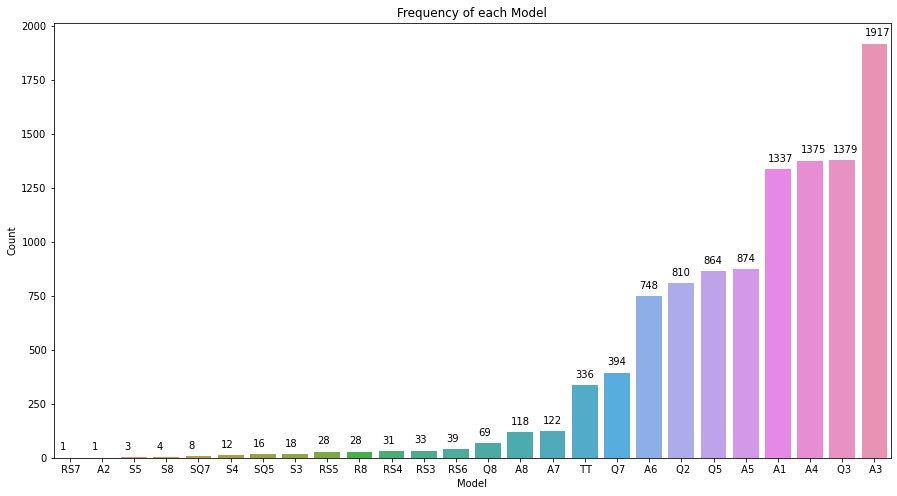

In [12]:
count_of_model = data_copy['model'].value_counts().sort_values() # series having count of models in asc order
plt.figure(figsize=(15,8))
ax=sns.countplot(data=data_copy, x='model',order=count_of_model.index)
plt.title('Frequency of each Model')
plt.xlabel('Model')
plt.ylabel('Count')
for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+35))

Model RS7 and A2 have only 1 row of data and cannot be used for prediction so we drop them later

In [13]:
print("Data ranges from the year\033[1m",min(data_copy['year']),"to",max(data_copy['year']))

Data ranges from the year 1997 to 2020


#### Lets analyze the numerical columns now

In [14]:
data_copy.describe() 
#we observe high standard deviations and we will take a closer look at this later

,year,price,mileage,tax,mpg,engineSize
count,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000,10565.000000
mean,2017.084524,22853.956081,24955.960530,125.909134,50.837558,1.932977
std,2.167309,11723.076767,23448.942551,67.408761,12.963337,0.602902
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19268.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36668.000000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


<AxesSubplot:>

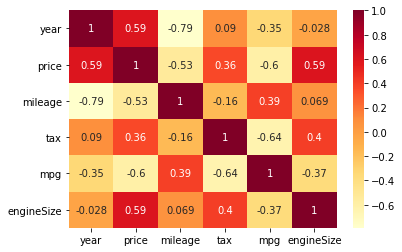

In [15]:
sns.heatmap(data_copy.corr(),annot=True,cmap='YlOrRd')


The above correlation matrix gives us important information such as:
    
    Price and mileage have negative correlation indicating that the car which has travelled more (more used) is cheaper.
    Price and mpg also have a negative correlation showing that expensive audi generally have lower miles per gallon.
    Price has positive corr with enginesize as bigger engine provides more power and hence is more expensive.

In [16]:
#before moving on let's remove the two models with only one entry
cleaned_data = data_copy[(data_copy['model']!=' RS7')&(data_copy['model']!=' A2')]
cleaned_data.shape

(10563, 9)

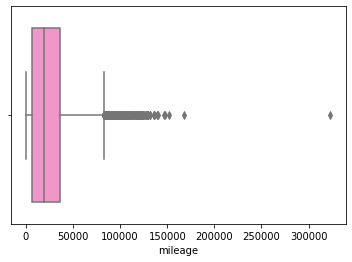

In [17]:
ax=sns.boxplot(data=cleaned_data,x='mileage',color='#FF87CA')

#### Boxplot shows outliers obve 170k which can skew our results significantly

In [18]:
cleaned_data = cleaned_data[cleaned_data['mileage']<170000] # we remove our outlier and save the data in new dataframe
cleaned_data.shape

(10562, 9)

<AxesSubplot:xlabel='mileage'>

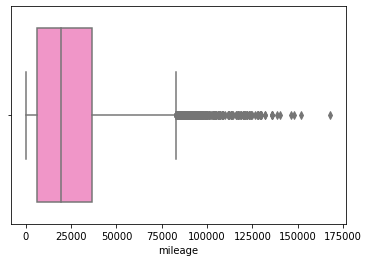

In [19]:
sns.boxplot(data=cleaned_data,x='mileage',color='#FF87CA') 

<AxesSubplot:xlabel='tax'>

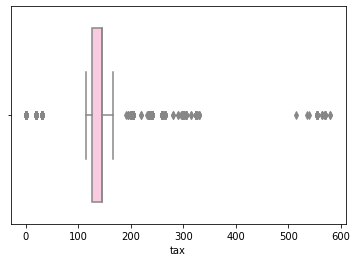

In [20]:
sns.boxplot(data=cleaned_data,x='tax',color="#FFC4E1")

#### Tax is unevenly distributed but does not have a very hight std dev. so it is best to remove values above 500 

In [21]:
cleaned_data = cleaned_data[(cleaned_data['tax']<=500)] #removing outliers
cleaned_data.shape

(10523, 9)

<AxesSubplot:xlabel='tax'>

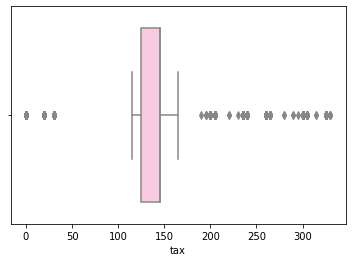

In [22]:
sns.boxplot(data=cleaned_data,x='tax',color="#FFC4E1") 

<AxesSubplot:xlabel='mpg'>

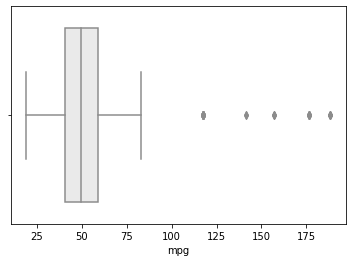

In [23]:
sns.boxplot(data=cleaned_data,x='mpg',color='#EAEAEA')

#### 100+ values can be easily seen as the outliers 

In [24]:
cleaned_data = cleaned_data[(cleaned_data['mpg']<100)]

<AxesSubplot:xlabel='mpg'>

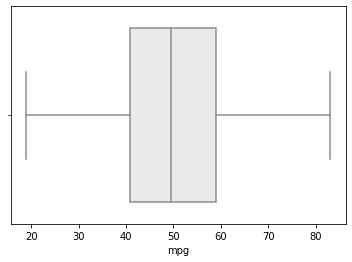

In [25]:
sns.boxplot(data=cleaned_data,x='mpg',color='#EAEAEA')

In [26]:
print("We removed", len(data_copy)-len(cleaned_data),"outliers")

We removed 75 outliers


In [27]:
cleaned_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,10490.000000,10490.000000,10490.000000,10490.000000,10490.000000,10490.000000
mean,2017.103527,22792.202002,24815.435748,124.422307,50.628103,1.925319
std,2.134918,11649.164163,23166.035500,61.913969,11.596914,0.585791
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15000.000000,6000.000000,125.000000,40.900000,1.500000
50%,2017.000000,20000.000000,19129.000000,145.000000,49.600000,2.000000
75%,2019.000000,27965.000000,36477.750000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,168017.000000,330.000000,83.100000,5.200000


We note that mileage still has high std dev , this is mainly becuase data has cars from wide range of years and that's y some of them have driven much more compared to others

### Now let's analyze the outcome variable - price 

Text(0.5, 1.0, 'Price of different models')

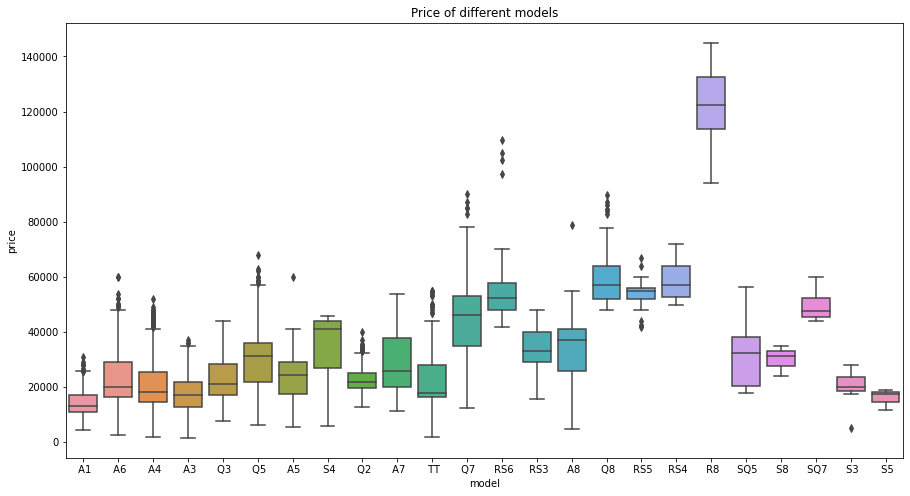

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(data=cleaned_data,x='model',y='price')
plt.title("Price of different models")

R8 Models have a much higher price range compared to others while A series is relatively cheaper

Text(0.5, 1.0, 'Price Based on the size of engine')

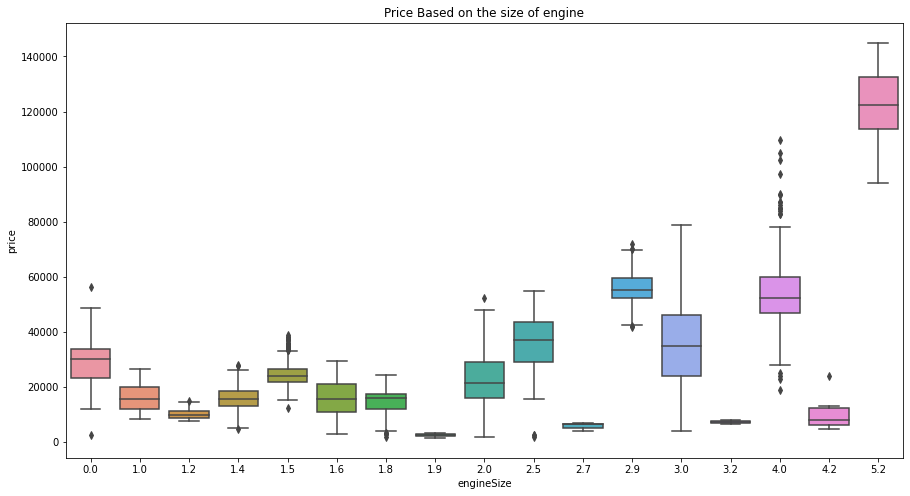

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(data=cleaned_data,x='engineSize',y='price')
plt.title("Price Based on the size of engine")

Price generally increases with increase in engine size

Text(0.5, 1.0, 'Distribution of price based on Fuel Type')

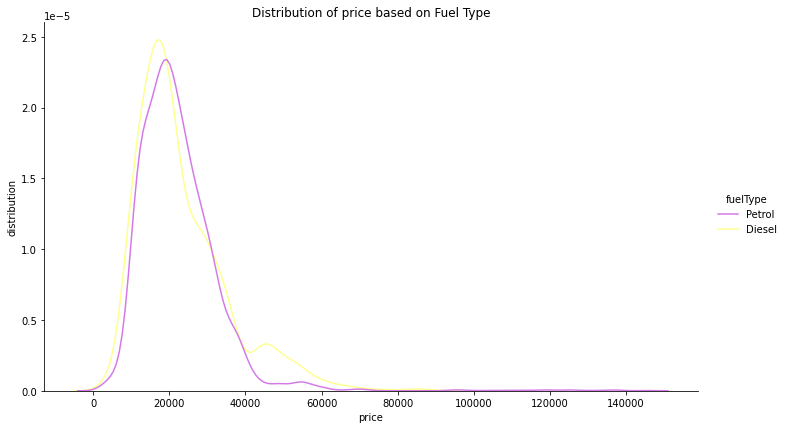

In [30]:
colors = ["#D47AE8","#FDFF8F","#F4BEEE","#A8ECE7"]
sns.displot(data=cleaned_data,x='price',kind='kde',height=6, aspect=10/6,hue='fuelType',palette=sns.color_palette(colors,2))
plt.ylabel("distribution")
plt.title("Distribution of price based on Fuel Type")

While both Petrol and Diesel have similar distribution , Petrol has higher mean and skewness

Text(0.5, 1.0, 'Distribution of price based on Transmission type')

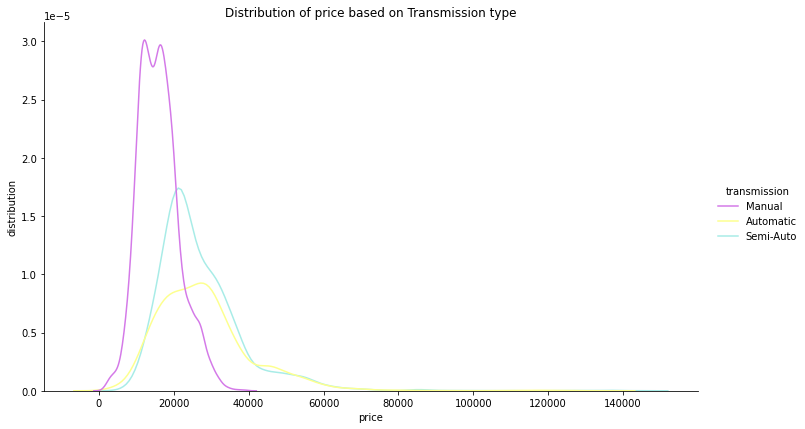

In [31]:
colors = ["#D47AE8","#FDFF8F","#A8ECE7","#F4BEEE"]
sns.displot(data=cleaned_data,x='price',kind='kde',height=6, aspect=10/6,hue='transmission',palette=sns.color_palette(colors,3))
plt.ylabel("distribution")
plt.title("Distribution of price based on Transmission type")

Manual is normally distributed while automatic and semi automatic have higher means but also a lot more skewness.

<AxesSubplot:xlabel='year', ylabel='price'>

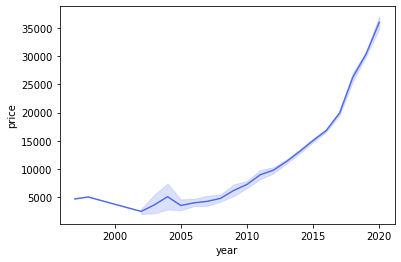

In [32]:
sns.lineplot(x='year',y='price',data=cleaned_data,color="#516BEB")

Newer cars are more expensive

Text(0.5, 1.0, 'Distribution of Year')

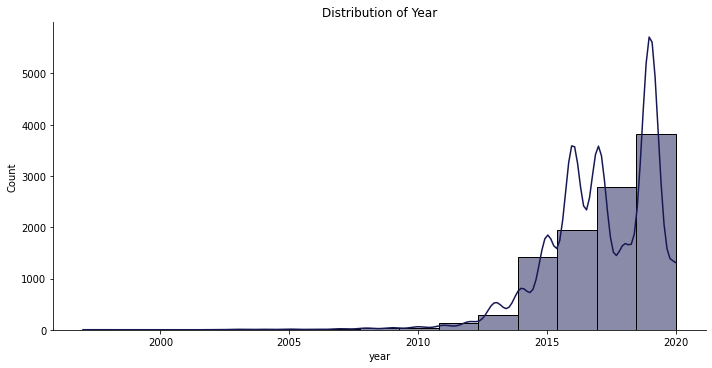

In [33]:
sns.displot(data=cleaned_data,x='year',kde=True,height=5, aspect=10/5,bins=15,color="#161853")
plt.title("Distribution of Year")

Majority of data is after 2010

Text(0.5, 1.0, 'Distribution of Mileage')

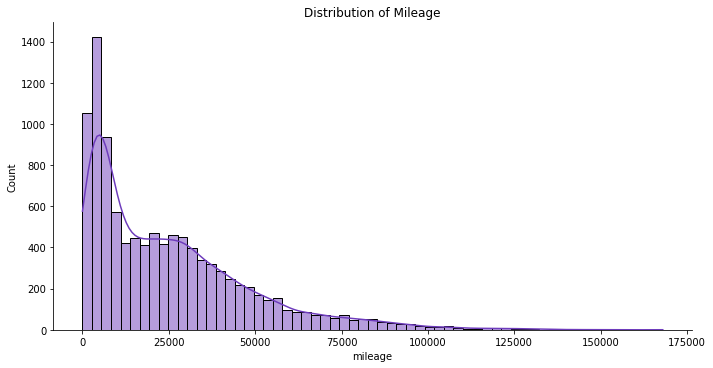

In [34]:
sns.displot(data=cleaned_data,x='mileage',kde=True,height=5, aspect=10/5,color="#6E3CBC")
plt.title("Distribution of Mileage")

Text(0.5, 1.0, 'Count of different types of transmission')

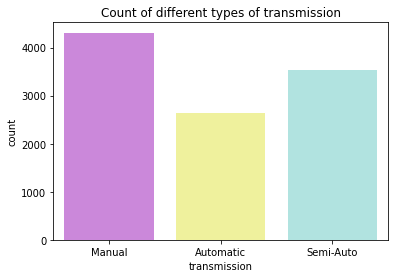

In [35]:
colors = ["#D47AE8","#FDFF8F","#A8ECE7","#F4BEEE"]
sns.countplot(data=cleaned_data, x='transmission',palette=sns.color_palette(colors,3))
plt.title("Count of different types of transmission")

Text(0.5, 1.0, 'Count of fuel types')

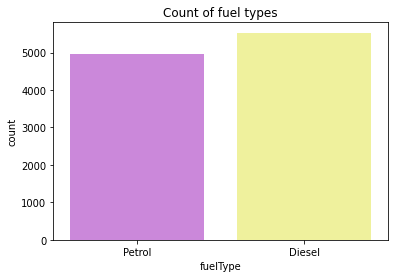

In [36]:
colors = ["#D47AE8","#FDFF8F","#F4BEEE","#A8ECE7"]
sns.countplot(data=cleaned_data, x='fuelType',palette=sns.color_palette(colors,2))
plt.title("Count of fuel types")

Text(0.5, 1.0, 'Average engine Size for each model')

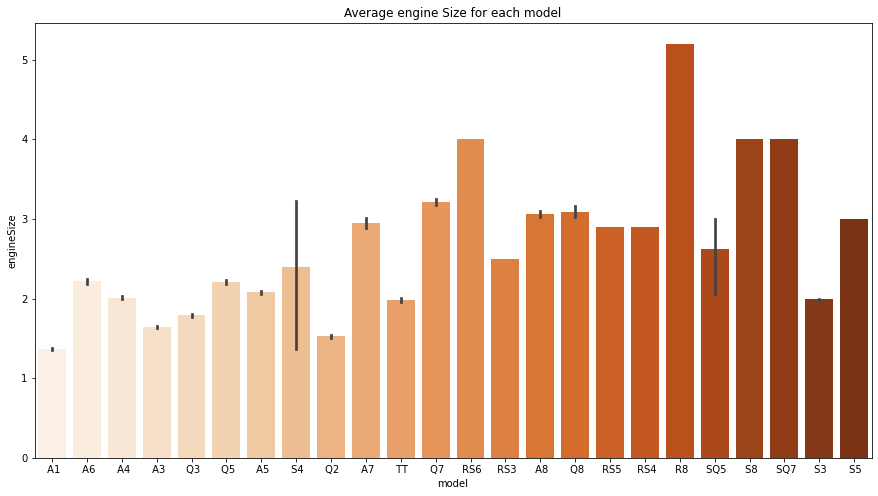

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=cleaned_data,x='model',y='engineSize',palette='Oranges')
plt.title("Average engine Size for each model")

Text(0.5, 1.0, 'Mileage vs Price')

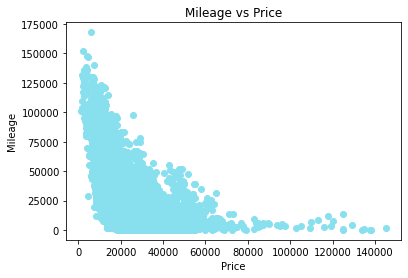

In [38]:
plt.scatter(x=cleaned_data['price'],y=cleaned_data['mileage'],color="#88E0EF")
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.title("Mileage vs Price")

# Feature Engineering & Linear Regression

After cleaning and exploratotry data analysis , we next prepare the data to be fed into a regression model

- Firstly we need to convert all the categorical variable into numeric values by one hot encoding them
- We also need to standardize the predictors using standardScaler or MinMaxScaler, this is essential for regularized regression
- We also normalize the outcome variable price using boxcox to yield more accurate results

In [39]:
data_dummy = pd.get_dummies(cleaned_data,drop_first=True)  #one hot encode all the categorical variable in the dataframe

In [40]:
data_dummy.head()

,year,price,mileage,tax,mpg,engineSize,model_ A3,model_ A4,model_ A5,model_ A6,...,model_ S3,model_ S4,model_ S5,model_ S8,model_ SQ5,model_ SQ7,model_ TT,transmission_Manual,transmission_Semi-Auto,fuelType_Petrol
0,2017,12500,15735,150,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,2016,16500,36203,20,64.2,2.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2016,11000,29946,30,55.4,1.4,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,2017,16800,25952,145,67.3,2.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2019,17300,1998,145,49.6,1.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [41]:
#import sklearn libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
y = data_dummy['price'] #outcome variable
x = data_dummy.drop('price',axis=1)  #predictors
se = StandardScaler()  #initializing the standard scalar
X = se.fit_transform(x) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) #split the data into training and test sets

In [43]:
# normalizing outcome variable
from scipy.stats import boxcox
result = boxcox(y_train)
y_train_bc = result[0]
lam = result[1]

In [44]:
lr = LinearRegression()  
lr.fit(X_train,y_train_bc) #fit the model
y_pred_bc = lr.predict(X_test)  #make prediction

In [45]:
# we need to convert the predicted variable to their original scale 
from scipy.special import inv_boxcox  
y_pred_tran = inv_boxcox(y_pred_bc,lam)

In [46]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': np.round(y_pred_tran)})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head(5)

,index,Actual Price,Predicted Price
0,8388,11960,11491.0
1,7503,31990,30499.0
2,6531,22990,24894.0
3,7332,31490,30490.0
4,8645,29950,29626.0


In [47]:
print("The root mean squared error for a simple regression model is:\033[1m",np.sqrt(np.sum((y_pred_tran-y_test)**2)/len(y_test)))

The root mean squared error for a simple regression model is: 2959.01096371645


# Regularized regression

In [48]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

In [49]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [50]:
from sklearn.model_selection import GridSearchCV
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1,2, 3],
    'ridge_regression__alpha': np.geomspace(4, 50, 20)
}
grid = GridSearchCV(estimator, params, cv=3,verbose=True)

In [51]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.56869428,  5.21824185,  5.96013791,  6.80751199,
        7.77536027,  8.88081099, 10.14342758, 11.58555488, 13.23271457,
       15.11405683, 17.26287623, 19.71720095, 22.52046578, 25.72228078,
       29.37930924, 33.55627049, 38.32708523, 43.77618372, 50.        ])},
             verbose=True)

In [52]:
y_pred = grid.predict(X_test)

In [53]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted = pricePredicted.reset_index()
pricePredicted.head()

,index,Actual Price,Predicted Price
0,8388,11960,11227.618221
1,7503,31990,28649.916072
2,6531,22990,24163.522002
3,7332,31490,31149.075438
4,8645,29950,29722.497238


In [54]:
print("The rmse for a ridge regression model is:\033[1m",np.sqrt(mean_squared_error(y_pred,y_test)))

The rmse for a ridge regression model is: 2536.670160732293


In [55]:
grid.best_params_  #best paramteres

{'polynomial_features__degree': 2,
 'ridge_regression__alpha': 49.99999999999999}

Ridge regression using l2 norms managed to reduce the rmse and yield a better result

On a side note , i tried Lasso Regression as well but it took a lot of time and did not converge , ended up overfitting and yield sub optimal results and therefore i decided to not include it

# Conclusion

- Both Normal and Regularized regression did an above average job at predicting the price with rmse between 2500 to 30000
- Lasso Regression was not suitable for modelling the above dataset (more feature engineering would be needed which might result in loss of valuable info)
- Ridge > Linear > Lasso (for this dataset)
- Will implement more regression techniques as i learn them :)